In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
import os
import importlib
from IPython.display import Audio

os.chdir("..")
import context
context.get()

import baseMethods
importlib.reload(baseMethods)

import magSonify
from magSonify import SimulateData

## Notes

Overall, the reproduction in frequency space with the phaseVocoder is very good, as one might expect. One should note that at the beggining (~first 2500 samples) the amplitude is far higher than the rest of the signal. This region has been cropped here in order to allow the output to be normalised properly. This phenomena wasn't observed when sonifying real world THEMIS data, which is likely related to the variation in signal amplitude of the real world data.

The freqency resolution of nearby harmonics actually seems to be comparable to paulstretch, being able to clearly distinguish 200Hz, but not 100Hz. 

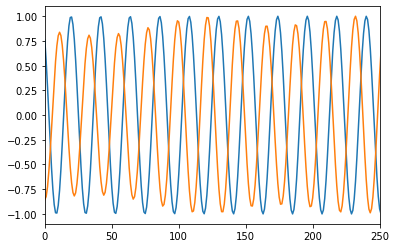

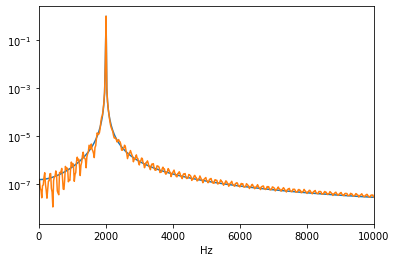

In [2]:
stretch = 16
freq = 2000
expect,after = baseMethods.compare_Sine('phaseVocoderStretch',freq,stretch)
def myDisplay(expect,after,xRange=[0,10000],timeGraphXshift = 0,frontEndCut = 2500):
    expect = expect[frontEndCut:]
    after = after[frontEndCut:]
    expect.normalise()
    after.normalise()
    plt.plot(expect.x)
    plt.plot(after.x)
    plt.xlim(np.array([0,250])+timeGraphXshift)
    plt.show()
    baseMethods.plotPSD(expect,after,showPlot=False)
    plt.xlim(xRange)
    return expect, after
expect,after = myDisplay(expect,after)
plt.show()

In [3]:
Audio(expect.x,rate=44100)

In [4]:
Audio(after.x,rate=44100)

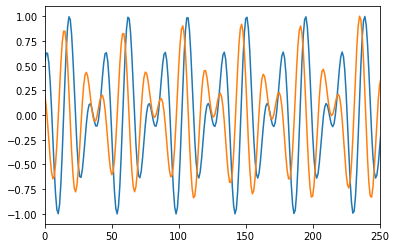

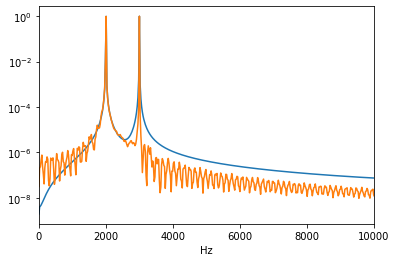

In [5]:
freqs = (2000,3000)
expect,after = baseMethods.compare_Harmonic('phaseVocoderStretch',freqs,stretch)
expect,after = myDisplay(expect,after)
plt.show()

In [6]:
Audio(expect.x,rate=44100)

In [7]:
Audio(after.x,rate=44100)

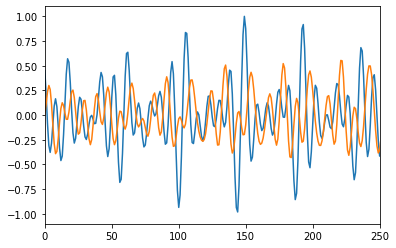

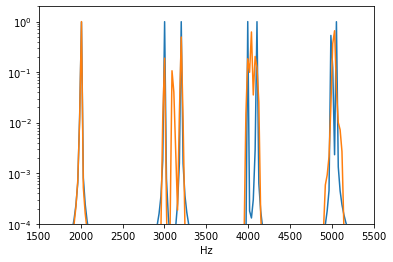

In [9]:
freqs = (2000,3000,3200,4000,4100,5000,5050)
expect,after = baseMethods.compare_Harmonic('phaseVocoderStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[1500,5500])
plt.ylim([1e-4,2])
plt.show()